## Installations

#Set up

Run 8 cells hidden

## Download packages

- pretrained models
- prefitted scaler/normalizer

ResNet50 model: https://drive.google.com/file/d/1quWrng--vaoxk-PqA9ABvuW7ltvy-RiL/view?usp=drive_link

In [1]:
!gdown 1quWrng--vaoxk-PqA9ABvuW7ltvy-RiL

Downloading...
From: https://drive.google.com/uc?id=1quWrng--vaoxk-PqA9ABvuW7ltvy-RiL
To: /content/ResNet50_transfer.zip
100% 265M/265M [00:04<00:00, 59.6MB/s]


In [2]:
!unzip ResNet50_transfer.zip

Archive:  ResNet50_transfer.zip
   creating: ResNet/assets/
  inflating: ResNet/fingerprint.pb   
  inflating: ResNet/variables/variables.index  
  inflating: ResNet/keras_metadata.pb  
  inflating: ResNet/saved_model.pb   
  inflating: ResNet/variables/variables.data-00000-of-00001  


## Load models

In [3]:
import tensorflow as tf

# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('ResNet')

# Show the model architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 24,640,391
Trainable params: 23,468,551
Non-trainable params: 1,171,840
__________________________________

## Data preparation

In [4]:
from google.colab import files
from IPython.display import Image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [5]:
class_names = ['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']

#Deploying

Click `Run Cell` button, upload image and wait for the result

Saving IMG_20230707_122122.jpg to IMG_20230707_122122.jpg
1/1 [==============================] - 0s 266ms/step
This one is: metal


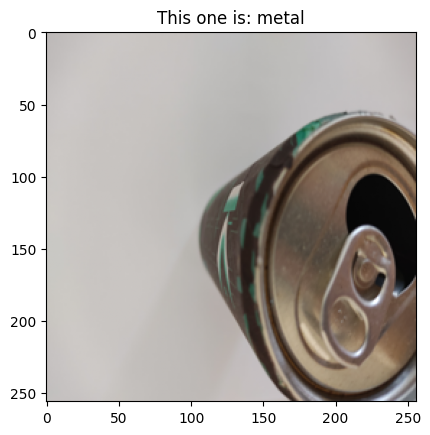

In [8]:
#@title classify trash with a image
uploaded = files.upload()
image_name = uploaded.keys()
for path in image_name:
    image_name = path
    break

img = Image.open(image_name).convert('RGB').resize((256,256), Image.BICUBIC)
img = np.array([np.array(img)]) / 255.
y_pred = np.argmax(new_model.predict(img), axis=1)[0]

plt.imshow(img[0])
plt.title(f"This one is: {class_names[y_pred]}")

print(f"This one is: {class_names[y_pred]}")